# Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('shopping_trends.csv')

# Explore Data

In [4]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


- Customer ID : Unique identifier for each customer
- Age : Age of the customer
- Gender : Gender of the customer (Male/Female)
- Item Purchased : The item purchased by the customer
- Category : Category of the item purchased
- Purchase Amount (USD) : The amount of the purchase in USD
- Location : Location where the purchase was made
- Size : Size of the purchased item
- Color : Color of the purchased item
- Season : Season during which the purchase was made
- Review Rating : Rating given by the customer for the purchased item
- Subscription Status : Indicates if the customer has a subscription (Yes/No)
- Shipping Type : Type of shipping chosen by the customer
- Discount Applied : Indicates if a discount was applied to the purchase (Yes/No)
- Promo Code Used : Indicates if a promo code was used for the purchase (Yes/No)
- Previous Purchases : The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
- Payment Method : Customer's most preferred payment method
- Frequency of Purchases : Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [4]:
data.shape

(3900, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
# check Missing value
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

- No Missing Value is avalible

In [7]:
# Check Duplication
data.duplicated().sum()

0

- There aren't duplicate values

In [8]:
# Check the number of unique values of each column
data.nunique()

Customer ID                 3900
Age                           53
Gender                         2
Item Purchased                25
Category                       4
Purchase Amount (USD)         81
Location                      50
Size                           4
Color                         25
Season                         4
Review Rating                 26
Subscription Status            2
Payment Method                 6
Shipping Type                  6
Discount Applied               2
Promo Code Used                2
Previous Purchases            50
Preferred Payment Method       6
Frequency of Purchases         7
dtype: int64

In [9]:
# Check statistic of dataset
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


# Analysis & Visualiation

In [10]:
# Drop Column Customer ID because it is not important in the analysis
data=data.drop(['Customer ID'],axis=1)

In [11]:
data.Age.describe()

count    3900.000000
mean       44.068462
std        15.207589
min        18.000000
25%        31.000000
50%        44.000000
75%        57.000000
max        70.000000
Name: Age, dtype: float64

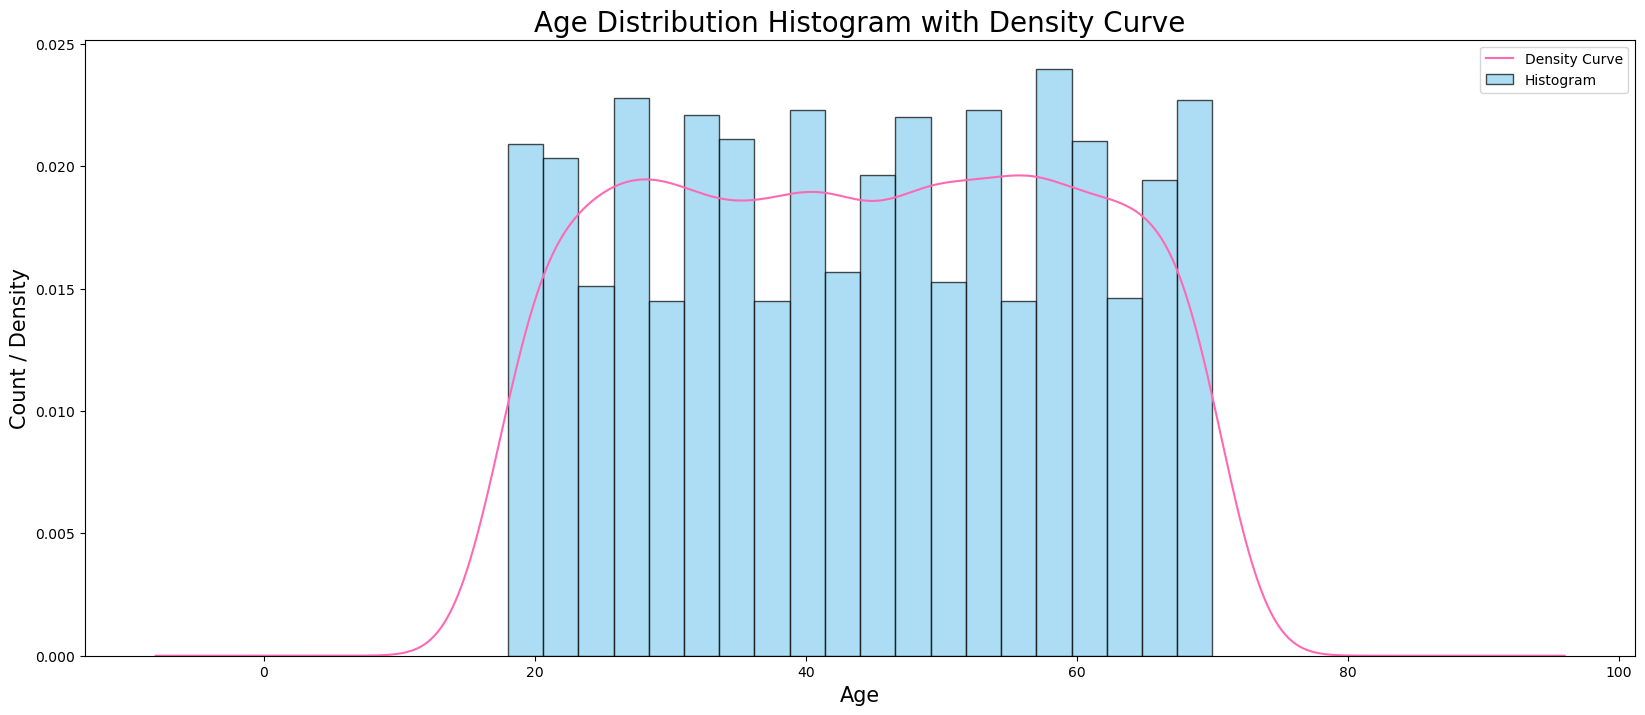

In [10]:
fig, ax = plt.subplots(figsize = (20, 8))
ax.hist(data['Age'], bins = 20, edgecolor = 'black', alpha = 0.7, color = "#89CFF0", density = True)
data['Age'].plot(kind = 'kde', color = "#FF69B4", ax = ax)

plt.xlabel('Age',fontsize=15)
plt.ylabel('Count / Density',fontsize=15)
plt.title('Age Distribution Histogram with Density Curve',fontsize=20)
ax.legend(['Density Curve', 'Histogram'])
plt.show()

- The average age of customers is 44 years

Gender
Male      2652
Female    1248
Name: count, dtype: int64 



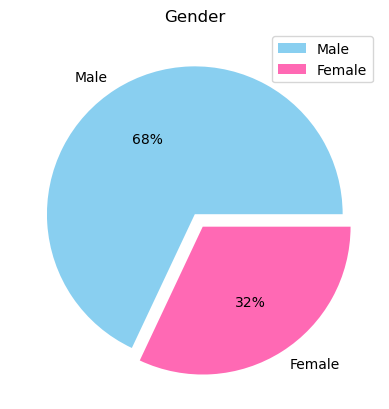

In [13]:
gender = data.Gender.value_counts()
print(gender,'\n')

plt.pie(gender,labels=gender.index,colors=["#89CFF0", "#FF69B4"],autopct='%.0f%%',explode=(0,0.1))
plt.legend(labels = gender.index, loc = "best")
plt.title('Gender')
plt.show()

- We notice that the number of male customers is much greater than the number of female customers.

In [14]:
data['Item Purchased'].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

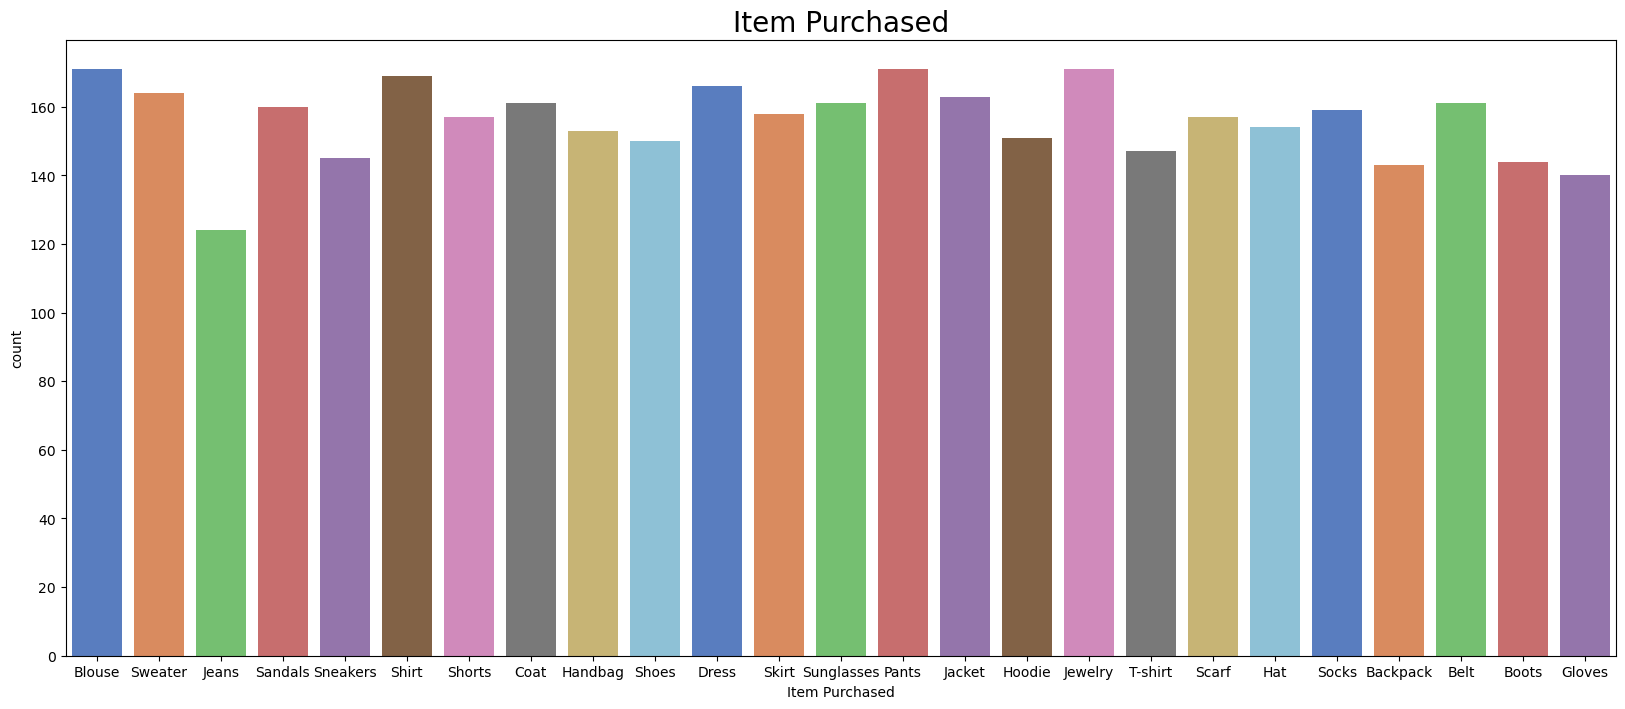

In [7]:
plt.subplots(figsize=(20,8), dpi=100)
sns.countplot(data= data, x='Item Purchased',palette='muted')
plt.title("Item Purchased",fontsize=20)
plt.show()

-  The most sold Item are Blouse, Jewelry and Pants.

In [16]:
CountOfCategory = data['Category'].value_counts()
CountOfCategory

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

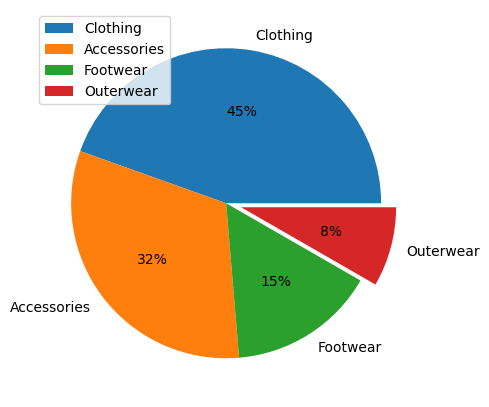

In [59]:
plt.figure(figsize=(5,8))
plt.pie(CountOfCategory,labels=CountOfCategory.index,autopct='%0.0f%%',explode=(0,0,0,0.1))
plt.legend(CountOfCategory.index,loc =2)
plt.show()

- Most types of  Category of the item purchased are Clothing and Accessories.

In [39]:
season = data['Season'].value_counts()
season

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

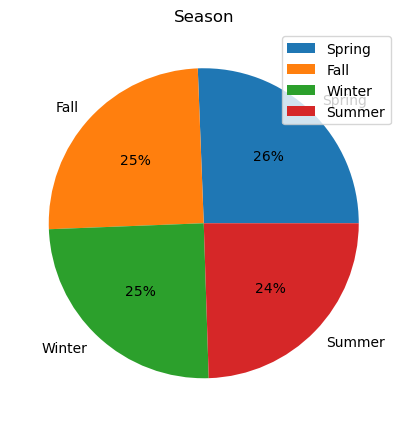

In [55]:
plt.figure(figsize=(5,8))
plt.pie(season,labels=['Spring','Fall','Winter','Summer'],autopct='%0.0f%%')
plt.legend( ['Spring','Fall','Winter','Summer'],loc =1)
plt.title('Season')
plt.show()


- Season doesn't affect on the purchase was made.

In [12]:
Payment_Method = data['Payment Method'].value_counts()
Payment_Method

Payment Method
Credit Card      696
Venmo            653
Cash             648
PayPal           638
Debit Card       633
Bank Transfer    632
Name: count, dtype: int64

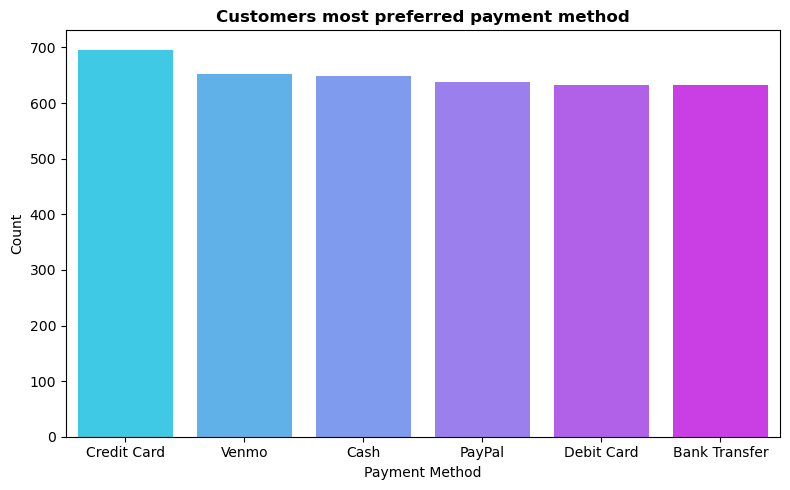

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(x=Payment_Method.index,y=Payment_Method, palette='cool',linewidth = 5)
plt.title('Customer''s most preferred payment method',loc='center',fontweight='bold',fontsize=12)
plt.xlabel('Payment Method',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.tight_layout()
plt.show()

- Most Common Payment Method: PayPal

### Total purchase amount for each gender 

In [26]:
data.groupby('Gender')['Purchase Amount (USD)'].sum()

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

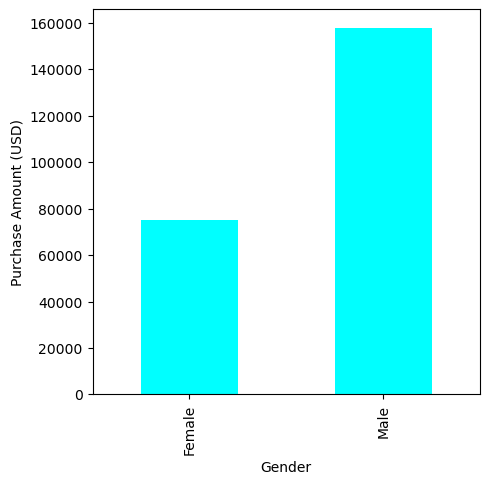

In [27]:
data.groupby('Gender')['Purchase Amount (USD)'].sum().plot(kind='bar',figsize=(5,5),colormap='cool',ylabel='Purchase Amount (USD)')

### To know the number of categories that are purchased in each season

In [30]:
pd.crosstab(data['Season'],data['Category'])

Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,324,427,136,88
Spring,301,454,163,81
Summer,312,408,160,75
Winter,303,448,140,80


<Axes: xlabel='Season', ylabel='Count'>

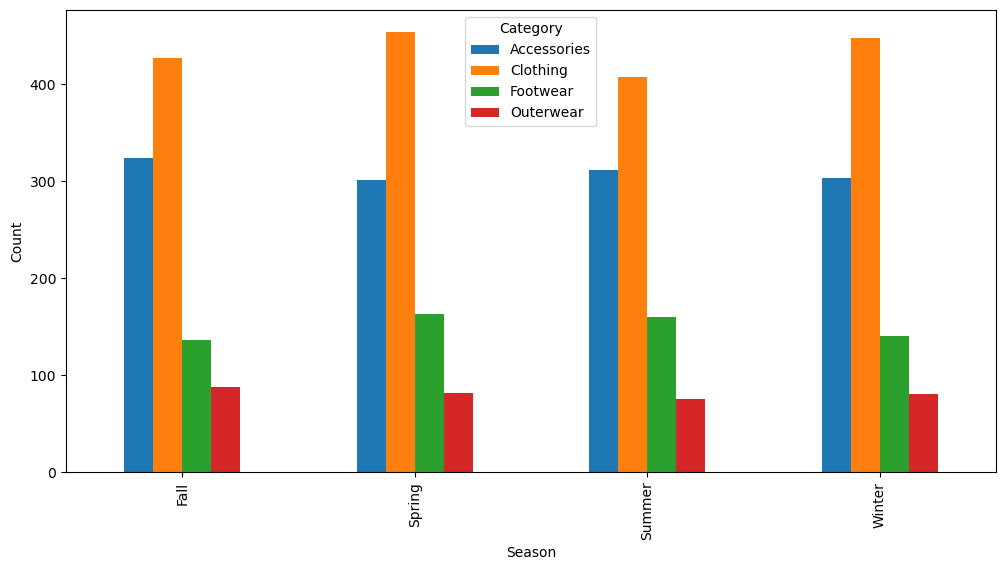

In [31]:
pd.crosstab(data['Season'],data['Category']).plot(kind='bar',figsize=(12,6),ylabel='Count')